# 任务
- 将地理坐标落到地图上
- 从出行量、出行率、方式、时耗、距离、时间分布、空间分布等8个方面对比，描述两个区居民出行的特征差异
- 利用TransCAD等软件工具生成出行期望线
- 结果分析部分需要包含一个两个区的指标对比表格
- 上交作业时间为4月4日21:00，请大家把作业发送到我的邮箱15300608983@163.com，作业统一命名为“学号_姓名_居民出行调查数据分析作业”

<hr></hr>
出行率：类出行总量/类总人口 次/人* 天  
出行量： 是不是按总量要扩样？  
方式： 百分比图 按目的分类  
时耗： 百分比图  
距离：分布图  
出行目的： 通勤 非通勤  
出行时间分布：ppt77  
空间分布 期望线？

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 出行量与出行率

In [2]:
df1 = pd.read_excel(r"C:\Users\D\Desktop\学生28\宝山28.xlsx",sheet_name=1)
df2 = pd.read_excel(r"C:\Users\D\Desktop\学生28\宝山28.xlsx",sheet_name=2)
# df1 = pd.read_excel(r"C:\Users\D\Desktop\学生28\金山28.xlsx",sheet_name=1)
# df2 = pd.read_excel(r"C:\Users\D\Desktop\学生28\金山28.xlsx",sheet_name=2)
df = pd.merge(df1,df2)

In [3]:
for i in range(0,10):
    m = df[(df.年龄>=i*10)&(df.年龄<i*10+10)]
    n = df1[(df1.年龄>=i*10)&(df1.年龄<i*10+10)]
    print('{}-{},{},{}'.format(10*i,10*i+10,len(n),len(m)))

0-10,3,6
10-20,1,2
20-30,33,65
30-40,8,21
40-50,1,4
50-60,7,14
60-70,6,14
70-80,0,0
80-90,0,0
90-100,0,0


In [4]:
# 按年龄和性别交叉分类
# 人口矩阵
#    男 女
#0-10
#10-20 ...
# df1 = pd.read_excel(r"C:\Users\D\Desktop\学生28\宝山28.xlsx",sheet_name=1)
# df2 = pd.read_excel(r"C:\Users\D\Desktop\学生28\宝山28.xlsx",sheet_name=2)
df1 = pd.read_excel(r"C:\Users\D\Desktop\学生28\金山28.xlsx",sheet_name=1)
df2 = pd.read_excel(r"C:\Users\D\Desktop\学生28\金山28.xlsx",sheet_name=2)
df = pd.merge(df1,df2)
num = pd.DataFrame(columns=['m','f'],index=["{}-{}".format(i*10,i*10+10) for i in range(0,10)])
pop = pd.DataFrame(columns=['m','f'],index=["{}-{}".format(i*10,i*10+10) for i in range(0,10)])
for i in range(0,10):
    m = df[(df.年龄>=i*10)&(df.年龄<i*10+10)]
    n = df1[(df1.年龄>=i*10)&(df1.年龄<i*10+10)]
    num.iloc[i,0] = len(m[m['性别']==1])
    num.iloc[i,1] = len(m[m['性别']==2])
    pop.iloc[i,0] = len(n[n['性别']==1])
    pop.iloc[i,1] = len(n[n['性别']==2])

# 交通方式
- 一个问题,nan到底是什么数据，可以和什么相等？

In [5]:
df1 = pd.read_excel(r"C:\Users\D\Desktop\学生28\宝山28.xlsx",sheet_name=2)
df2 = pd.read_excel(r"C:\Users\D\Desktop\学生28\金山28.xlsx",sheet_name=2)

In [6]:
df1.columns

Index(['新家庭编号', '出行编号', '新成员编号', '出行次数', '出发地点纬度X', '出发地点经度Y', '出发地用地性质',
       '出发时间', '到达时间', '到达地点纬度X', '到达地点经度Y', '到达地用地性质', '出行时耗', '出行目的', '调查员',
       '是否完成', '同行人数', '全程步行', '第一种交通方式', '第二种交通方式', '第三种交通方式', '第四种交通方式',
       '第五种交通方式', '主要交通方式', '到达地停车费', '出发地到上车站时耗', '出发地到上车站费用', '轨道上车站',
       '轨道下车站', '下车站到到达地时耗', '下车站到到达地费用'],
      dtype='object')

In [7]:
bs = np.array(df1.第一种交通方式.tolist())
print("公共交通：",len(np.where(bs==5)[0])+len(np.where(bs==9)[0])+len(np.where(bs==10)[0]))
print("出租车：",len(np.where(bs==4)[0]))
print("个体机动：",len(np.where(bs==6)[0])+len(np.where(bs==7)[0])+len(np.where(bs==8)[0]))
print("电动车：",len(np.where(bs==2)[0]))
print("自行车：",len(np.where(bs==1)[0]))
print("步行：",np.isnan(bs).sum())

公共交通： 15
出租车： 0
个体机动： 33
电动车： 32
自行车： 13
步行： 33


In [8]:
bs = np.array(df2.第一种交通方式.tolist())
print("公共交通：",len(np.where(bs==5)[0])+len(np.where(bs==9)[0])+len(np.where(bs==10)[0])+len(np.where(bs==11)[0]))
print("出租车：",len(np.where(bs==4)[0]))
print("个体机动",len(np.where(bs==6)[0])+len(np.where(bs==7)[0])+len(np.where(bs==8)[0])+len(np.where(bs==3)[0]))
print("电动车",len(np.where(bs==2)[0]))
print("自行车",len(np.where(bs==1)[0]))
print("步行",np.isnan(bs).sum())

公共交通： 26
出租车： 2
个体机动 24
电动车 73
自行车 11
步行 53


In [9]:
bs = np.array(df2.第一种交通方式.tolist())
for i in range(0,8):
    bs = np.array(df1[df1.出行目的==i].第一种交通方式.tolist())
    print("___________________{}_________________".format(i))
    print("公共交通：",len(np.where(bs==5)[0])+len(np.where(bs==9)[0])+len(np.where(bs==10)[0])+len(np.where(bs==11)[0]))
    print("出租车：",len(np.where(bs==4)[0]))
    print("个体机动：",len(np.where(bs==6)[0])+len(np.where(bs==7)[0])+len(np.where(bs==8)[0])+len(np.where(bs==3)[0]))
    print("电动车：",len(np.where(bs==2)[0]))
    print("自行车：",len(np.where(bs==1)[0]))
    print("步行：",np.isnan(bs).sum())

___________________0_________________
公共交通： 0
出租车： 0
个体机动： 0
电动车： 0
自行车： 0
步行： 0
___________________1_________________
公共交通： 4
出租车： 0
个体机动： 12
电动车： 7
自行车： 6
步行： 0
___________________2_________________
公共交通： 0
出租车： 0
个体机动： 1
电动车： 4
自行车： 0
步行： 3
___________________3_________________
公共交通： 0
出租车： 0
个体机动： 1
电动车： 1
自行车： 1
步行： 9
___________________4_________________
公共交通： 1
出租车： 0
个体机动： 0
电动车： 0
自行车： 0
步行： 1
___________________5_________________
公共交通： 0
出租车： 0
个体机动： 0
电动车： 0
自行车： 0
步行： 0
___________________6_________________
公共交通： 2
出租车： 0
个体机动： 1
电动车： 0
自行车： 0
步行： 1
___________________7_________________
公共交通： 0
出租车： 0
个体机动： 5
电动车： 8
自行车： 0
步行： 2


# 时耗

In [10]:
df1 = pd.read_excel(r"C:\Users\D\Desktop\学生28\宝山28.xlsx",sheet_name=2)
df2 = pd.read_excel(r"C:\Users\D\Desktop\学生28\金山28.xlsx",sheet_name=2)
df1.columns

Index(['新家庭编号', '出行编号', '新成员编号', '出行次数', '出发地点纬度X', '出发地点经度Y', '出发地用地性质',
       '出发时间', '到达时间', '到达地点纬度X', '到达地点经度Y', '到达地用地性质', '出行时耗', '出行目的', '调查员',
       '是否完成', '同行人数', '全程步行', '第一种交通方式', '第二种交通方式', '第三种交通方式', '第四种交通方式',
       '第五种交通方式', '主要交通方式', '到达地停车费', '出发地到上车站时耗', '出发地到上车站费用', '轨道上车站',
       '轨道下车站', '下车站到到达地时耗', '下车站到到达地费用'],
      dtype='object')

In [11]:
df1.出行时耗.mean()

28.277777777777803

In [12]:
df2.出行时耗.mean()

21.296296296296298

In [13]:
max_s = max(df1.出行时耗.max(),df2.出行时耗.max())
dic1={}
dic2={}
for i in range(0,200,10):
    dic1[i] = len(df1[(df1.出行时耗>=i)&(df1.出行时耗<i+10)])/len(df1)
    dic2[i] = len(df2[(df2.出行时耗>=i)&(df2.出行时耗<i+10)])/len(df2)

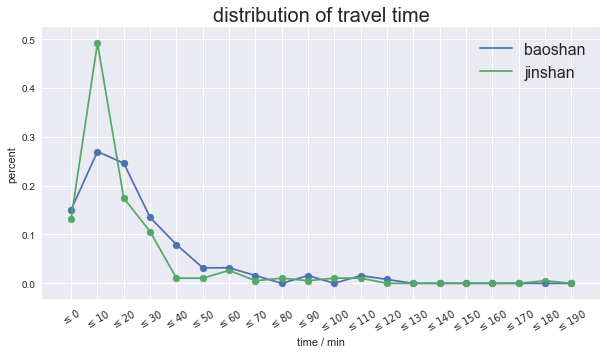

In [16]:
plt.figure(figsize=(10,5))
x = list(dic1.keys())
y = list(dic1.values())
plt.plot(x,y,label='baoshan')
plt.scatter(x,y)
x = list(dic2.keys())
y = list(dic2.values())
plt.plot(x,y,label='jinshan')
plt.scatter(x,y)
plt.legend(loc='upper right',fontsize=16)
plt.title('distribution of travel time',loc='center',fontsize=20)
plt.xticks(x,[r"$\leq{}$".format(i) for i in range(0,200,10)],rotation=30)
plt.xlabel('time / min')
plt.ylabel('percent')
plt.show()

In [43]:
# 距离
# from geopy.distance import vincenty
# newport_ri = (41.49008, -71.312796)
# cleveland_oh = (41.499498, -81.695391)
# print(vincenty(newport_ri, cleveland_oh).miles)
# 538.3904451566326
from geopy.distance import great_circle
s_lon1 = df1.出发地点纬度X.tolist()
s_lat1 = df1.出发地点经度Y.tolist()
e_lon1 = df1.到达地点纬度X.tolist()
e_lat1 = df1.到达地点经度Y.tolist()
dis1 = [great_circle((i,j),(k,m)).kilometers for i,j,k,m in zip(s_lat1,s_lon1,e_lat1,e_lon1)]
s_lon2 = df2.出发地纬度.tolist()
s_lat2 = df2.出发地经度.tolist()
e_lon2 = df2.到达地纬度.tolist()
e_lat2 = df2.到达地经度.tolist()
dis2 = [great_circle((i,j),(k,m)).kilometers for i,j,k,m in zip(s_lat2,s_lon2,e_lat2,e_lon2)]

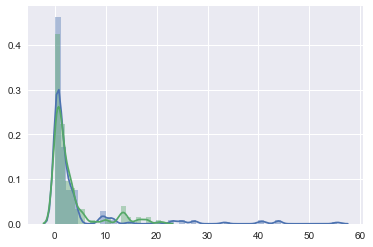

In [47]:
sns.distplot(dis2)
sns.distplot(dis1)

In [28]:
df1

,新家庭编号,出行编号,新成员编号,出行次数,出发地点纬度X,出发地点经度Y,出发地用地性质,出发时间,到达时间,到达地点纬度X,到达地点经度Y,到达地用地性质,出行时耗,出行目的,调查员,是否完成,同行人数,全程步行,第一种交通方式,第二种交通方式,第三种交通方式,第四种交通方式,第五种交通方式,主要交通方式,到达地停车费,出发地到上车站时耗,出发地到上车站费用,轨道上车站,轨道下车站,下车站到到达地时耗,下车站到到达地费用,distance
0,223,1335,651,2,121.40859,31.37962,1,07:30:00,08:00:00,121.31163,31.34366,2,30.0,1,周阳洋,是,0,否,2.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.78821
1,223,1336,651,2,121.31163,31.34366,2,16:30:00,17:00:00,121.40859,31.37962,1,30.0,8,周阳洋,是,0,否,2.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.65529
2,223,1337,652,2,121.40859,31.37962,1,07:30:00,08:30:00,121.39613,31.35670,2,60.0,1,周阳洋,是,0,否,2.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.78821
3,223,1338,652,2,121.39613,31.35670,2,16:30:00,17:00:00,121.40859,31.37962,1,30.0,8,周阳洋,是,0,否,2.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.75283
4,621,3571,1648,2,121.40012,31.35340,1,07:30:00,07:40:00,121.40159,31.35128,3,10.0,3,苏晓婷,是,0,是,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,152.75352
5,621,3572,1648,2,121.40159,31.35128,3,08:00:00,08:10:00,121.40012,31.35340,1,10.0,8,苏晓婷,是,0,是,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,152.75287
6,621,3573,1649,3,121.40012,31.35340,1,07:00:00,07:45:00,121.38938,31.35470,7,45.0,7,苏晓婷,是,1,否,7.0,NaN,NaN,NaN,NaN,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.75352
7,621,3574,1649,3,121.38938,31.35470,7,07:50:00,08:10:00,121.38259,31.35295,2,20.0,1,苏晓婷,是,0,否,7.0,NaN,NaN,NaN,NaN,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.74408
8,621,3575,1649,3,121.38259,31.35295,2,17:00:00,17:30:00,121.40012,31.35340,1,30.0,8,苏晓婷,是,0,否,7.0,NaN,NaN,NaN,NaN,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.73554
9,621,3576,1650,2,121.40012,31.35340,1,15:45:00,15:55:00,121.38938,31.35470,7,10.0,7,苏晓婷,是,0,否,2.0,NaN,NaN,NaN,NaN,2.0,0,NaN,NaN,NaN,NaN,NaN,NaN,152.75352
